### Thinking1
既然内容相似度计算简单，能频繁更新，为什么还需要协同过滤算法呢？

答：因为基于内容的相似度是静态的，而协同过滤算法是动态的，可以更好地反映用户偏好的实时动向。

### Thinking2

你需要推荐系统么？哪些情况下不需要推荐系统？

答：只有系统规模较大时才会需要推荐系统，对于规模较小的情况使用人工可能性价比会更高。

### Thinking3

如果给一个视频打标签，视频中有音乐作为背景音乐，采用了NLP方式对内容自动打标签，可能存在什么问题？

答：视频所配的音乐可能与视频的实际内容不符合，仅依据背景音乐来进行标签可能会使得标签有误。

### Action1
针对mnist数据集进行分类，采用CART决策树（工具使用sklearn中的CART），可以参考课程代码 mnist_lr.py

(1797, 64)
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
0


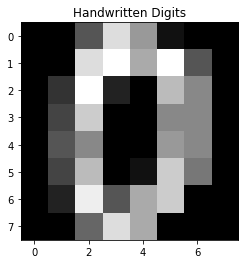

In [13]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

# 加载数据
digits = load_digits()
data = digits.data

# 数据探索
print(data.shape)
print(data[0])
print(digits.images[0])
print(digits.target[0])

# 将第一幅图像显示出来
plt.gray()
plt.title('Handwritten Digits')
plt.imshow(digits.images[0])
plt.show()

CART准确率: 0.8467


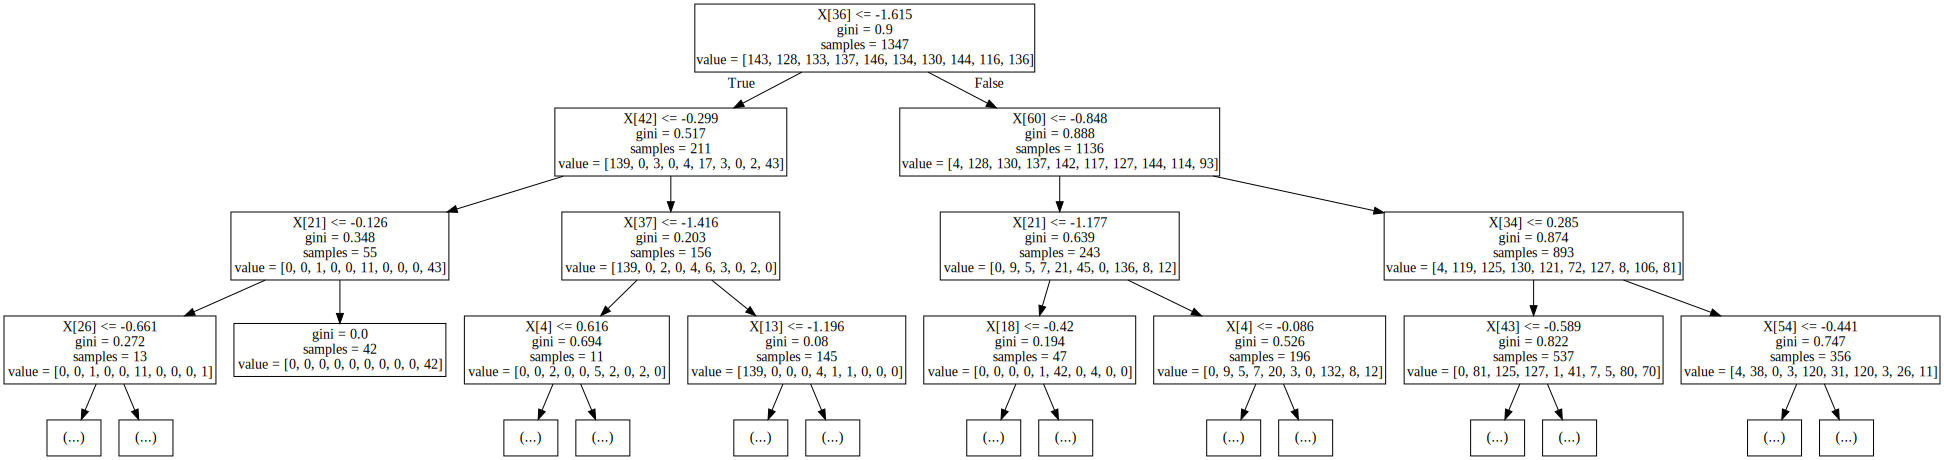

In [30]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import tree
import graphviz 
# 分割数据，将25%的数据作为测试集，其余作为训练集
train_x, test_x, train_y, test_y = train_test_split(data, digits.target, test_size=0.25, random_state=33)

# 采用Z-Score规范化
ss = preprocessing.StandardScaler()
train_ss_x = ss.fit_transform(train_x)
test_ss_x = ss.transform(test_x)

# 创建CART分类器
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_ss_x, train_y)
print('CART准确率: %0.4lf' %clf.score(test_ss_x, test_y))

# 显示生成的树（前3层）
dot_data = tree.export_graphviz(clf, out_file=None, max_depth=3) 
graph = graphviz.Source(dot_data) 
graph